## Lecture5
1. 编程实现Logistic regression算法
2. 利用正态分布数据进行训练测试，输出给出具体要求的解


随机数据不分批次

logistic w:
 [-1.14182511e-07 -1.24170898e-02 -1.25015358e-02]
logistic iteration: 100
logistic time: 2.9593966007232666


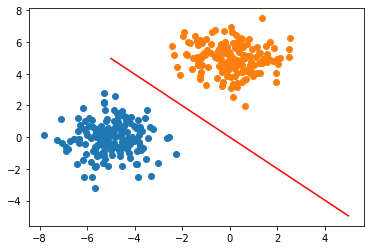

epoch-loss


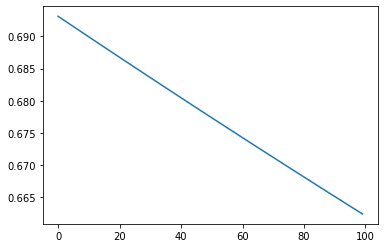

index-estimate,下面是训练集每个数据的属于该类别的概率值,蓝色为训练数据，橙色为测试数据


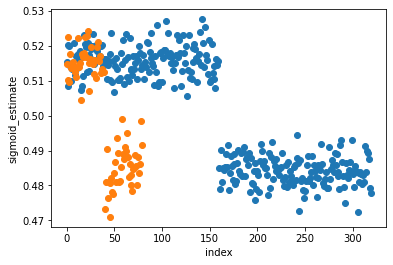


随机数据分1次一批

logistic w:
 [ 0.00180389 -0.72842457 -0.72933552]
logistic iteration: 100
logistic time: 4.20409893989563


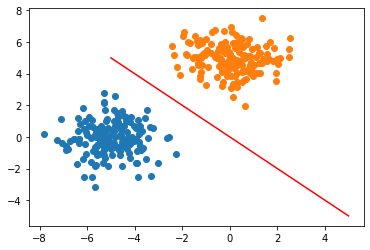

epoch-loss


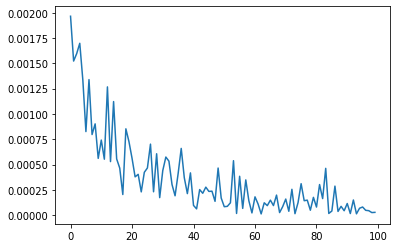

index-estimate,下面是训练集每个数据的属于该类别的概率值,蓝色为训练数据，橙色为测试数据


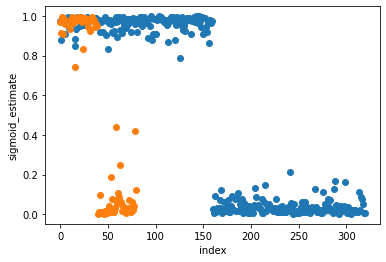


随机数据分1次一批，1000次迭代

logistic w:
 [ 0.00450765 -1.30635488 -1.29814924]
logistic iteration: 1000
logistic time: 42.6599440574646


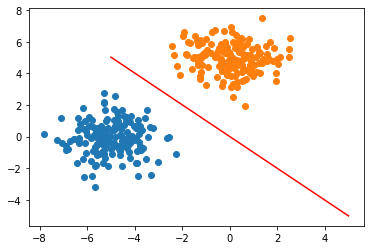

epoch-loss


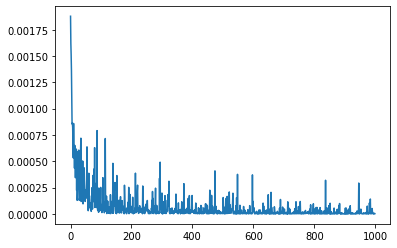

index-estimate,下面是训练集每个数据的属于该类别的概率值,蓝色为训练数据，橙色为测试数据


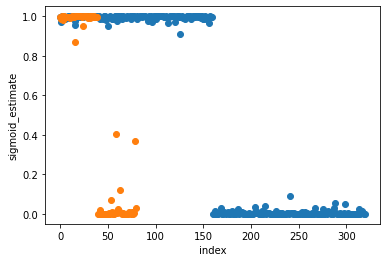

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

X1 = np.random.multivariate_normal((-5,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,5), [[1,0],[0,1]], (200,), 'ignore')


X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

X1_train = np.array(X1_train)
X1_test = np.array(X1_test)
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)


data_logistic_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)]))   #合并数据

data_logistic_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

def sigmoid(s):
  return 1/(1 + math.exp(-s))

def list_split(items, n):
  return [items[i:i+n] for i in range(0, len(items), n)]

def logistic(batch_size = len(data_logistic_train), max_count = 100, rate = 0.0001):
  start = time.time()

  data = np.array(data_logistic_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  count = 0
  w = np.transpose(np.mat([.0,.0,.0]))
  list_loss = []
  while count < max_count:
    data = np.array(data_logistic_train)
    np.random.shuffle(data)     #随机数据
    batch_data = np.array(list_split(data, batch_size))   #根据batch_size分批
    flag = 0
    for i in range(0, len(batch_data)):
      X = np.mat(batch_data[i][:,:-1])
      Y = np.transpose(np.mat(batch_data[i][:,-1]))
      grad = 0
      loss = 0
      loss_sum = 0
      for i in range(0,len(X)):
        loss += math.log(1 + math.exp(-Y[i][0,0] * np.transpose(w) * np.transpose(X[i])))
        grad += sigmoid(-Y[i][0,0] * np.transpose(w) * np.transpose(X[i])) * (-Y[i][0,0] * np.transpose(X[i]))
      loss_sum += loss
      loss /= len(X)
      grad /= len(X)
      w -= rate * grad
    loss_sum /= len(data)
    list_loss.append([count, loss_sum])
    count += 1


  end = time.time()

  data = np.array(data_logistic_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  list_estimate = []        #计算每个数据的概率
  for i in range(0, len(X)):
    list_estimate.append([i, sigmoid(np.transpose(w) * np.transpose(X[i]))])
  
  w = np.array(np.transpose(w)).reshape(3)  #变更格式

  print("\nlogistic w:\n",w)
  print("logistic iteration:",count)
  print("logistic time:",end - start)

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_train[:,0], X1_train[:,1])
  plt.scatter(X2_train[:,0], X2_train[:,1])
  plt.show()

  list_loss = np.array(list_loss)
  print("epoch-loss")
  plt.plot(list_loss[:,0],list_loss[:,1])
  plt.show()

  

  list_estimate = np.array(list_estimate)
  print("index-estimate,下面是训练集每个数据的属于该类别的概率值,蓝色为训练数据，橙色为测试数据")
  plt.xlabel("index")
  plt.ylabel("sigmoid_estimate")
  plt.scatter(list_estimate[:,0],list_estimate[:,1])
  return w

def logistic_test(w):
  data = np.array(data_logistic_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  list_estimate = []        #计算每个数据的概率
  for i in range(0, len(X)):
    list_estimate.append([i, sigmoid(np.transpose(w) * np.transpose(X[i]))])

  list_estimate = np.array(list_estimate)
  plt.scatter(list_estimate[:,0],list_estimate[:,1])
  plt.show()


print("\n随机数据不分批次")
w = logistic()
logistic_test(w)
print("\n随机数据分1次一批")
w = logistic(1)
logistic_test(w)
print("\n随机数据分1次一批，1000次迭代")
w = logistic(1, 1000)
logistic_test(w)

1. 可以看到分批次随机数据分1次一批的效果很好，我尝试过其他批次，发现batch_size越小，效果越好。这是因为批次越小，w更新越快。
2. 样本分布改为(-1,0)；（0，-1），效果有所降低，相同次数迭代得到的sigmoid模拟值也下降。
3. 一千次迭代的效果明显好于100次，最后得到的概率值大部分数据贴近预期值